In [3]:
import sys
import time
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import model_selection, svm, preprocessing
from matplotlib import style

import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

style.use('ggplot')

In [4]:
n_samples = 6000

/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


label: 5
shapes: (6000, 784) (6000,)


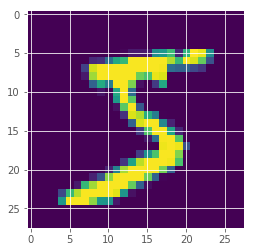

In [5]:
mnist = MNIST('.', train = True, download=True)
train_IMG = mnist.train_data.numpy().astype(float)
train_LABELS = mnist.train_labels.numpy()

plt.imshow(train_IMG[0])
print('label:', train_LABELS[0])

idx = np.random.permutation(len(train_IMG))[:n_samples]
train_img = train_IMG[idx]
train_labels = train_LABELS[idx]

X_train = train_img.reshape((train_img.shape[0],-1)) 
y_train = train_labels
print('shapes:', X_train.shape, y_train.shape)


label: 7
shapes: (1500, 784) (1500,)


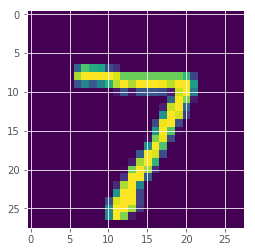

In [6]:
mnist_test = MNIST('.', train = False, download=True)
test_IMG = mnist_test.train_data.numpy().astype(float)
test_LABELS = mnist_test.train_labels.numpy()

plt.imshow(test_IMG [0])
print('label:', test_LABELS[0])

idx = np.random.permutation(len(test_IMG))[:1500]
test_img = test_IMG[idx]
test_labels = test_LABELS[idx]

X_test = test_img.reshape((test_img.shape[0],-1)) 
y_test = test_labels
print('shapes:', X_test.shape, y_test.shape)


In [8]:
def preprocess(gamma, X_train, Y, kernel = "LINEAR"):
    if kernel == "LINEAR":
        Q = np.array(X_train) @ np.array(X_train).T
    else:
        c = 0
        d = 3
        Q = np.power((np.dot(X_train,X_train.T) + c),d)
    matrix = Q + 1/gamma * np.identity(Q.shape[0])
    vec1 = np.array([[1]*Q.shape[0]])
    vec2 = np.array([[1]*Q.shape[0]+[0]])
    matrix = np.concatenate((matrix, vec1.T), axis = 1)
    matrix = np.concatenate((matrix, (vec2)))
    Y_train = np.array([[ int(i==j) for i in range(10)] for j in y_train])
    Y = np.concatenate((Y_train, np.array([[0]*10])))
    
    return matrix

def train(matrix, Y):
    # Q = pairwise.linear_kernel(X_train, X_train, dense_output=False) 
    res = np.linalg.solve(matrix, Y)
    
    return res

In [9]:
def predict(X_train,X_test,alpha,b, kernel = "LINEAR"):
    if kernel == "LINEAR":
        w = X_train.T @ alpha
        f = b + X_test @ w
    else:
        c = 0.0
        d = 3
        f = np.power((np.dot(X_test,X_train.T) + c),d) @alpha
    y_pred = np.argmax(f, axis = 1)
    
    return y_pred

In [7]:
Y_train = np.array([[ int(i==j) for i in range(10)] for j in y_train])
Y = np.concatenate((Y_train, np.array([[0]*10])))

time elapsed: 3.579762

Creating Confusion Matrix...

Predicted Values:  [6 2 8 ... 9 9 3]

Accuracy of Classifier on Test Images:  0.9573333333333334

Confusion Matrix: 
 [[167   0   0   0   0   1   2   1   1   0]
 [  0 167   2   2   0   0   1   0   1   0]
 [  0   0 136   2   2   1   1   2   2   0]
 [  0   0   0 158   0   2   0   2   1   2]
 [  0   0   0   0 139   0   1   0   1   0]
 [  1   0   0   3   1 118   2   1   0   0]
 [  1   0   0   0   1   0 145   1   0   0]
 [  0   0   2   2   0   0   0 148   0   4]
 [  0   0   0   3   0   1   0   0 133   2]
 [  0   1   0   1   4   1   2   0   0 125]]


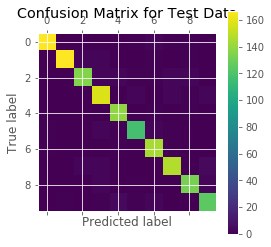

In [8]:
matrix = preprocess(0.1, X_train, Y,"POLY")

start = time.time()
res = train(matrix, Y)
end = time.time()

print("time elapsed: %f" %(end-start))

alpha = res[:n_samples] 
b = res[-1]

y_pred = predict(X_train, X_test,alpha,b,"POLY")
    
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Test Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
niter = 10
timediff1 = 0
timediff2 = 0
avg_acc1 = 0
avg_acc2 = 0
n_samples = 15000

for i in range(niter):
    #train data
    idx = np.random.permutation(len(train_IMG))[:n_samples]
    train_img = train_IMG[idx]
    train_labels = train_LABELS[idx]
    X_train = train_img.reshape((train_img.shape[0],-1)) 
    y_train = train_labels
    
    #test data
    idx = np.random.permutation(len(test_IMG))[:1500]
    test_img = test_IMG[idx]
    test_labels = test_LABELS[idx]

    X_test = test_img.reshape((test_img.shape[0],-1)) 
    y_test = test_labels
    
    #lssvm
    Y_train = np.array([[ int(i==j) for i in range(10)] for j in y_train])
    Y = np.concatenate((Y_train, np.array([[0]*10])))
    
    matrix = preprocess(0.1, X_train, Y,"POLY")

    start1 = time.time()
    res = train(matrix, Y)
    end1 = time.time()
    timediff1 += end1-start1
    print("1", end1-start1)
    
    alpha = res[:n_samples] 
    b = res[-1]

    y_pred = predict(X_train, X_test,alpha,b,"POLY")
    
    avg_acc1 += accuracy_score(y_test, y_pred)
    
    #svm
    start2 = time.time()
    clf = svm.SVC(gamma=0.1, kernel='poly')
    clf.fit(X_train,y_train)
    end2 = time.time()
    timediff2 += end2-start2
    print("2", end2-start2)
    y_pred = clf.predict(X_test)
    
    avg_acc2 += accuracy_score(y_test, y_pred)
    

print("time elapsed: %f" %(timediff1/niter))

print("time elapsed: %f" %(timediff2/niter))

print('\nAccuracy of Classifier on Test Images: ',avg_acc1/niter)

print('\nAccuracy of Classifier on Test Images: ',avg_acc2/niter)

1 45.770477056503296
2 34.873536109924316
1 31.00380802154541
2 34.77439785003662
1 33.69503378868103
2 35.031168699264526
1 42.44896697998047
2 35.7386691570282
1 29.94259786605835
2 35.781343936920166
1 37.29708123207092
2 36.67079210281372
1 30.3838849067688
2 35.21885299682617
1 30.69999408721924
2 35.06502413749695
1 33.185779094696045
2 35.52101993560791
1 30.965508222579956
2 34.39999294281006
time elapsed: 34.539313
time elapsed: 35.307480

Accuracy of Classifier on Test Images:  0.9749333333333332

Accuracy of Classifier on Test Images:  0.9671333333333335


In [ ]:
time elapsed: 2.374228
time elapsed: 9.133228

Accuracy of Classifier on Test Images:  0.9645999999999999

Accuracy of Classifier on Test Images:  0.9494

In [ ]:
time elapsed: 5.948020
time elapsed: 14.797815

Accuracy of Classifier on Test Images:  0.9712

Accuracy of Classifier on Test Images:  0.9573333333333334